# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? ? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [199]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let's exploratore the data quickly to become familiarize with it and to check if there are any inconsistencies before we start the exploartory data analysis.

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


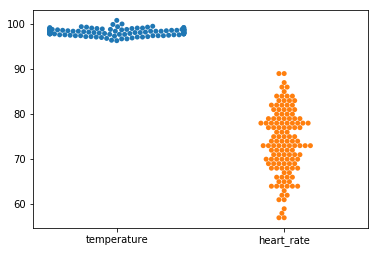

In [7]:
_ = sns.swarmplot(data=df)
plt.show()

The heart rate and the temperature seem to be in the expected human ranges and there are no NULL or missing values on the data frame, so we can start answering the questions.

### 1. Is the distribution of body temperatures normal? 

We are going to calculate the standard deviation and the mean of the temperature data to simulate a normal distribution to plot against the normalized temperature histogram.

In [8]:
#The mean and standard deviation of the temperatures are:
mean_T = np.mean(df.temperature)
std_T = np.std(df.temperature)

In [30]:
#We create a normal distribution set from the parameters above:
np.random.seed(42)
norm_T = np.random.normal(mean_T, std_T, size=100000)

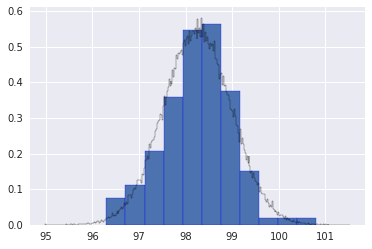

In [31]:
#We plot the simulated data with the original data
#for bin size we take the square root of the number of data points
sns.set()
_ = plt.hist(df.temperature, normed=True, bins=int(np.sqrt(len(df.temperature))), edgecolor='b')
_ = plt.hist(norm_T, normed=True, histtype = 'step', bins=int(np.sqrt(len(norm_T))), color='k')
plt.show()

**The temperature seems to be normally distributed but to be sure let's check with the cumulative density functions (CDF).**

In [32]:
def ecdf(data):
    #Function computing the ECDF of a one dimensional set of measurements
    x = np.sort(data)
    y = np.arange(1,len(data)+1) / len(data)
    return x, y    

In [33]:
#CDF for temperature data
x_T, y_T = ecdf(df.temperature)
#CDF for simulated data:
x_norm_T, y_norm_T = ecdf(norm_T)

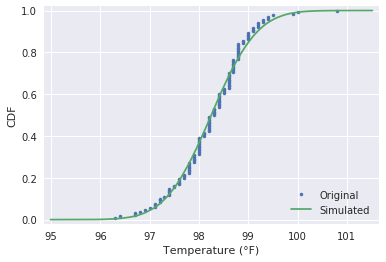

In [219]:
#Plotting CDF of measurements and simulated data
_ = plt.plot(x_T, y_T, marker='.', linestyle='none')
_ = plt.plot(x_norm_T, y_norm_T)
_ = plt.xlabel('Temperature (\u00b0F)')
_ = plt.ylabel('CDF')

plt.margins(0.02)
plt.legend(('Original', 'Simulated'), loc='lower right')

plt.show()

**From the CDF plots we see that the body temperatures CDF follows the normal distribution CDF. Then we can affirm that the distribution of body temperatures is normal.**

### 2. Is the sample size large? Are the observations independent?

In [29]:
print('The sample has {} entries.'.format(len(df)))

The sample has 130 entries.


Given that a scale defining large is not given in the problem let's use the conclusion from the question above to answer. 

From the question above we concluded that the temperature data follows the shape of a normal distribution, so by the definition of a normal distribution we infere that the temperature observations are independent and that at least the sample size was large enough to conclude on the normality of the data's distribution.

### 3. Is the true population mean really 98.6 degrees F?

 * Would you use a one-sample or two-sample test? Why?

The temperatures samples are taken for two kinds of populations: female and male. However as general knowledge, it is always accepted that the mean temperature for a human being is independent of its sex. Considering this and that the real mean is given I will use a one sample test where the gender is not assumed important in the final result. 

* In this situation, is it appropriate to use the $t$ or $z$ statistic?

Null hypothesis: the real population mean temperature is 98.6 <sup>o</sup>F and it may have been obtained if the data acquisition was repeated several times.

In [241]:
#Mean of the temperature data:
print('Mean temperature: {:.3} \u00b0F\nStandard deviation: {:.3} \u00b0F'.format(mean_T, std_T))

Mean temperature: 98.2 °F
Standard deviation: 0.73 °F


In [245]:
#True population mean
real_T = 98.6

In [246]:
#Shifted temperature data
df_shift = df.temperature - mean_T + real_T

In [247]:
def bs_reps(data, func, size=1):
    #Draw bootstrap replicates function.
    #data: data from which we create the replicate statistic
    #func: replicate statistic 
    #size: number of times to replicate

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [248]:
#Create 10000 bootstrap replicates of the shifted mean temperature
bs_replicates = bs_reps(df_shift, np.mean, size=10000)

In [252]:
#p value
p = np.sum(bs_replicates <= real_T) / len(bs_replicates)
print('The p value is: {:.3}'.format(p))

The p value is: 0.497


The p value is around 50% indicating that if the experiment is repeated, each time there is a 50% chance that the reported mean temperature is 98.6 <sup>o</sup>F. So we can accept that the population's true mean is 98.6 <sup>o</sup>F.

* Now try using the other test. How is the result be different? Why?

In this part we are going to test the same null hypothesis as previously stated, but this time we are going to test it separetely from the data obtained from male and female subjects.

In [253]:
#Separate the data between male an female
male_T = df.temperature[df.gender == 'M']
female_T = df.temperature[df.gender == 'F']
#Calculate means ands stds
mean_T_M = np.mean(male_T)
mean_T_F = np.mean(female_T)
std_T_M = np.std(male_T)
std_T_F = np.std(female_T)

print('The male mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_T_M, std_T_M))
print('The female mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_T_F, std_T_F))

The male mean temperature is 98.1 °F and its standard deviation is 0.693 °F
The female mean temperature is 98.4 °F and its standard deviation is 0.738 °F


In [254]:
#Shifted temperatures
shift_M = male_T - mean_T_M + real_T
shift_F = female_T - mean_T_F + real_T

In [255]:
#Create 10000 bootstrap replicates of the female and male mean temperature
bs_replicates_M = bs_reps(shift_M, np.mean, size=10000)
bs_replicates_F = bs_reps(shift_F, np.mean, size=10000)

In [256]:
#p values
p_M = np.sum(bs_replicates_M <= real_T) / len(bs_replicates)
p_F = np.sum(bs_replicates_F <= real_T) / len(bs_replicates)
print('The male p value is: {:.3}'.format(p_M))
print('The female p value is: {:.3}'.format(p_F))

The male p value is: 0.499
The female p value is: 0.501


For the male and female the data, the p value is around 50%, so as before, this test confirms the one-sample test allowing us to confirm that the real mean temperature is 98.6 <sup>o</sup>F.

###  4. Draw a small sample of size 10 from the data and repeat both tests. 

* Which one is the correct one to use? 
* What do you notice? What does this tell you about the difference in application of the $t$ and $z$ 

**One-sample test:**

To be able to use the same sample in the two-sample test, let's draw the 10 points sample by using an array of length equal to the dataframe's length and containing its indices.

In [328]:
#Array of lenght dataframe
ind = list(range(len(df)))
#10 sample points from ind
sample = np.random.choice(ind, 10)

In [329]:
#Sample data frame
df_10 = df.iloc[sample]

In [330]:
df_10

,temperature,gender,heart_rate
78,97.4,M,78.0
35,99.5,M,75.0
107,98.6,M,66.0
83,99.2,F,77.0
115,98.0,M,64.0
54,98.2,F,73.0
107,98.6,M,66.0
7,98.8,M,78.0
30,98.3,M,86.0
55,98.6,F,82.0


In [331]:
#Mean nd std of the temperature data:
mean_10_T = np.mean(df_10.temperature)
std_10_T = np.std(df_10.temperature)
print('Mean temperature: {:.3} \u00b0F\nStandard deviation: {:.3} \u00b0F'.format(mean_10_T, std_10_T))

Mean temperature: 98.5 °F
Standard deviation: 0.565 °F


In [332]:
#Shifted temperature data to real mean
df_10_shift = df_10.temperature - mean_10_T + real_T
#Create 10000 bootstrap replicates of the mean temperature
bs_replicates = bs_reps(df_10_shift, np.mean, size=10000)
#p value
p = np.sum(bs_replicates <= real_T) / len(bs_replicates)
print('The p value is: {:.3}'.format(p))

The p value is: 0.518


This value is very close to the one-sample test performed in the full data that gave a p value of 0.497.

**Two-sample test:**

In [333]:
#Separate the data between male an female
male_10_T = df_10.temperature[df_10.gender == 'M']
female_10_T = df_10.temperature[df_10.gender == 'F']
#Calculate means ands stds
mean_10_T_M = np.mean(male_10_T)
mean_10_T_F = np.mean(female_10_T)
std_10_T_M = np.std(male_10_T)
std_10_T_F = np.std(female_10_T)

print('The male mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_10_T_M, std_10_T_M))
print('The female mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_10_T_F, std_10_T_F))

The male mean temperature is 98.5 °F and its standard deviation is 0.609 °F
The female mean temperature is 98.7 °F and its standard deviation is 0.411 °F


In [334]:
#Shifted temperatures
shift_10_M = male_10_T - mean_10_T_M + real_T
shift_10_F = female_10_T - mean_10_T_F + real_T
#Create 10000 bootstrap replicates of the female and male mean temperature
bs_replicates_M = bs_reps(shift_10_M, np.mean, size=10000)
bs_replicates_F = bs_reps(shift_10_F, np.mean, size=10000)
#p values
p_M = np.sum(bs_replicates_M <= real_T) / len(bs_replicates)
p_F = np.sum(bs_replicates_F <= real_T) / len(bs_replicates)
print('The male p value is: {:.3}'.format(p_M))
print('The female p value is: {:.3}'.format(p_F))

The male p value is: 0.48
The female p value is: 0.634


These values are significantly different than p values obtained in the two-sample test performed with the full data frame which gave 0.499 and 0.501 for male and female respectively.

In one hand, one-sample test gave similar results when used in large samples and small samples. On the other hand, two-sample test doesn't give consistent results when the sample size is very small. Two-sample test is well suited for large samples on the condition that the separation of the data by category also gives rise to large subsets.

In the present example, one-sample test is the best method to use.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

* Start by computing the margin of error and confidence interval.

In [292]:
#Create 10000 bootstrap replicates of the shifted temperature's std
bs_replicates = bs_reps(df_shift, np.std, size=10000)
#95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("The 95% confidence interval for the temperature's std is between {:.3} \u00b0F and {:.3} \u00b0F"\
      .format(conf_int[0], conf_int[1]))

The 95% confidence interval for the temperature's std is between 0.625 °F and 0.831 °F


In [293]:
print("Somenone's temperature is abnormal when its temperature is:\n\
- Lower than {:.3} \u00b0F\nor\n- Higher than {:.3} \u00b0F".format(real_T - conf_int[0], real_T + conf_int[1])) 

Somenone's temperature is abnormal when its temperature is:
- Lower than 98.0 °F
or
- Higher than 99.4 °F


### 6. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [295]:
#Separate the data between male an female
male_T = df.temperature[df.gender == 'M']
female_T = df.temperature[df.gender == 'F']
#Calculate means ands stds
mean_T_M = np.mean(male_T)
mean_T_F = np.mean(female_T)
std_T_M = np.std(male_T)
std_T_F = np.std(female_T)

print('The whole mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_T, std_T))
print('The male mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_T_M, std_T_M))
print('The female mean temperature is {:.3} \u00b0F and its standard deviation is {:.3} \u00b0F'.format(mean_T_F, std_T_F))

The whole mean temperature is 98.2 °F and its standard deviation is 0.73 °F
The male mean temperature is 98.1 °F and its standard deviation is 0.693 °F
The female mean temperature is 98.4 °F and its standard deviation is 0.738 °F


The male and female mean temperatures and standard deviations are very similar bewteen them and also very close to the mean and standard deviation of the whole data. This seems to indicate there is no difference between males and females normal temperature but let's check the corresponding CDFs to confirm this observation.

In [296]:
#ecdf for the female and male data
x_M, y_M = ecdf(male_T)
x_F, y_F = ecdf(female_T)

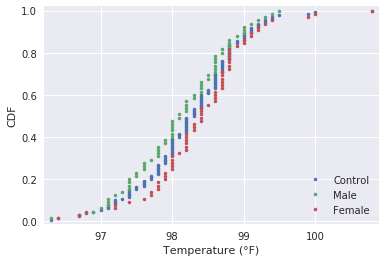

In [297]:
#plot ecdfs
_ = plt.plot(x_T, y_T, marker='.', linestyle='none')
_ = plt.plot(x_M, y_M, marker='.', linestyle='none')
_ = plt.plot(x_F, y_F, marker='.', linestyle='none')
_ = plt.xlabel('Temperature (\u00b0F)')
_ = plt.ylabel('CDF')
plt.margins(0.02)
plt.legend(('Control', 'Male', 'Female'), loc='lower right')
plt.show()

The female and male CDF seem to follow similar distributions but shifted with respect to one another. However, the CDF for whole data lies between the male and female CDFs. This is expected given that the whole data includes both the male and female data. From the plot above it seems to be a difference between males and females normal temperatures.

Combining the insights from the mean values and standard deviations with the CDFs plot it is difficult to conclude if there is any substantial difference between male and female distributions because they seem to contradict each other.

To really check if there is any difference between males and females normal temperature we then have to compare not only the mean temperature values of both genders but also their distributions simultaneously. This can be done doing a two-sample test using as permutation replicas the difference in mean temperatures between male and female. We are going to check how similar are the males and females normal temperature. For this we are going to consider that a p value below 0.05 rejects the null hypotesis, meaning it confirms that there is difference in the normal temperatures.

In [298]:
#Difference of means
diff_M_F = mean_T_M - mean_T_F
print("Difference of means between Male and Female samples: {:.3} \u00b0F".format(diff_M_F))

Difference of means between Male and Female samples: -0.289 °F


In [299]:
#Create 10000 bootstrap permutation replicates of the difference between male and female temperatures
all_T = np.concatenate((male_T, female_T))
diff_perm_bs = np.empty(10000)
for i in range(10000):
    permuted = np.random.permutation(all_T)
    new_M = permuted[0:len(male_T)]
    new_F = permuted[len(male_T):]
    diff_perm_bs[i] = np.mean(new_M) - np.mean(new_F)    

In [301]:
#p value:
p = np.sum(diff_perm_bs <= diff_M_F) / len(diff_perm_bs)
print("The p value is: {:.3}".format(p))

The p value is: 0.0134


The p value is below the defined threshold to reject the null hypotesis. So, we can say that there is a significant difference between difference between males and females normal temperature.